### Short Pick Report Week 2

In [65]:
# Numerical Data Manipulation libraries
import pandas as pd
import numpy as np
import statistics as stat

# Figure Plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set()

import matplotlib as mpl
sns.set_style('whitegrid')
sns.set_palette('Set2')
mpl.rcParams['font.size'] = 16
import matplotlib.gridspec as gridspec

# Naive Bayes libraries
import sklearn
from sklearn.naive_bayes import BernoulliNB      # Naive Bayes Classifier based on a Bernoulli Distribution
from sklearn.naive_bayes import GaussianNB       # Naive Bayes Classifier based on a Gaussian Distribution
from sklearn.naive_bayes import MultinomialNB    # Naive Bayes Classifier based on a Multinomial Distribution

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
# Text Analysis libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')


<h4> December Week 2</h4>

In [66]:
# Import the data
filename = "Data/Short_Pick_Report_10151223.csv" 


Short_pick_decWk2 = pd.read_csv(filename)


In [67]:
Short_pick_decWk2.rename(columns={'Bin:': 'Pickface', 'Part Number:': 'Stock Code', 'Picked By:': 'Picker', 'Site Qty @ Pick Time': 'Warehouse Qty', 'Bin Qty @ Pick Time': 'Pickface Qty'}, inplace=True)

# Dropping columns
columns_to_drop = ['Delivery To Name:', 'Exported?', 'Sales Order:', 'Part Description:', 'Time:' ]  # List of columns to drop
Short_pick_decWk2.drop(columns=columns_to_drop, inplace=True)

# Creating a new DataFrame
Short_DecWk2 = Short_pick_decWk2.copy()  # Creating a copy of the modified DataFrame

drop_condition = (Short_DecWk2['Picked:'] == 0) & (Short_DecWk2['Warehouse Qty'] == 0)  & (Short_DecWk2['Pickface Qty'] == 0)

Short_DecWk2 = Short_DecWk2[~drop_condition]

print(Short_DecWk2)

      Pickface  Stock Code  Picker  Warehouse Qty  Pickface Qty  Ordered:  \
1    4.17.2.70    11020201  justin           11.0          11.0       6.0   
2    4.17.2.70    11020201  justin           11.0          11.0       4.0   
3    1.02.2.20    11100024   steve            9.0           9.0       6.0   
4    4.17.1.80    11550016  justin            0.0           0.0       3.0   
5    A.03.3.40    11050213   steve            0.0           0.0      24.0   
..         ...         ...     ...            ...           ...       ...   
180  A.01.1.20    11440315  justin           11.0          11.0       8.0   
185  C.01.1.20    11590160  davidm            1.0           1.0       1.0   
186  3.12.1.30    11650072  justin           -1.0          -1.0       1.0   
187  A.03.3.10    11650502  justin           95.0         -37.0       2.0   
188  4.13.3.40    11360046  davidm            1.0           1.0       1.0   

     Picked:  
1        0.0  
2        0.0  
3        1.0  
4        1.0  


In [91]:
#Adding new column with difference of columns ordered and picked

 #Creating a new column containing the difference
Short_DecWk2['Difference'] = Short_DecWk2['Ordered:'] - Short_DecWk2['Picked:']


Pickface_counts = Short_DecWk2['Pickface'].value_counts() #counts the pick face shorts

#filter shorted items by warehouse qty and a pickface of 0 or negative
warehouse_filtered_items = Short_DecWk2[(Short_DecWk2['Warehouse Qty'] >= 1) & (Short_DecWk2['Pickface Qty'] >= -1000) & (Short_DecWk2['Picked:'] == 0)] 

#filter shorted items by pickface qty >= 1 
pickface_filtered_items = Short_DecWk2[(Short_DecWk2['Warehouse Qty'] >= 1) & (Short_DecWk2['Pickface Qty'] >= 1) & (Short_DecWk2['Picked:'] == 0)]



Picker_counts_warehouse = warehouse_filtered_items['Picker'].value_counts() #counts pickers shorts for warehouse qty

Picker_counts_pickface = pickface_filtered_items['Picker'].value_counts()

Stock_counts = Short_DecWk2['Stock Code'].value_counts() #counts stock code shorts

grouped_Pickface = Short_DecWk2.groupby('Pickface')['Stock Code'].value_counts() #groups pickface and stock codes shorted times

grouped_pickface_picker = Short_DecWk2.groupby('Picker')['Stock Code'].value_counts()

desired_picker = "samt"
shorted_stock_by_picker = Short_DecWk2[(Short_DecWk2['Stock Code']) & (Short_DecWk2['Picker'] == desired_picker)]


pickfaces_2_or_more_shorts = Pickface_counts[Pickface_counts >= 2]

#print(Pickface_counts)
print(shorted_stock_by_picker)
#print(Stock_counts)

print(Picker_counts_warehouse)
#group data by the top 2 shorted 
P_A02110_Data = grouped_Pickface['A.02.1.10'] #P is pickface _ location _ 
P_504110_Data = grouped_Pickface['5.04.1.10']
print("Items shorted in pickface 'A.02.1.10' :\n",P_A02110_Data)
print("Items shorted in pickface '5.04.1.10' :\n", P_504110_Data)

     Pickface  Stock Code Picker  Warehouse Qty  Pickface Qty  Ordered:  \
25  A.02.1.10    11440117   samt           36.0          36.0       2.0   
28  A.02.1.10    11440117   samt           36.0          36.0       3.0   
29  A.02.1.10    11440117   samt           36.0          36.0       1.0   
30  A.02.1.10    11440117   samt           36.0          36.0       2.0   

    Picked:  Difference  
25      0.0         2.0  
28      0.0         3.0  
29      0.0         1.0  
30      0.0         2.0  
Picker
gregory    7
mick       6
davidm     5
samt       5
justin     4
tim        3
damir      3
steve      3
kane       2
Troy       2
Name: count, dtype: int64
Items shorted in pickface 'A.02.1.10' :
 Stock Code
11440117    10
Name: count, dtype: int64
Items shorted in pickface '5.04.1.10' :
 Stock Code
11440012    6
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

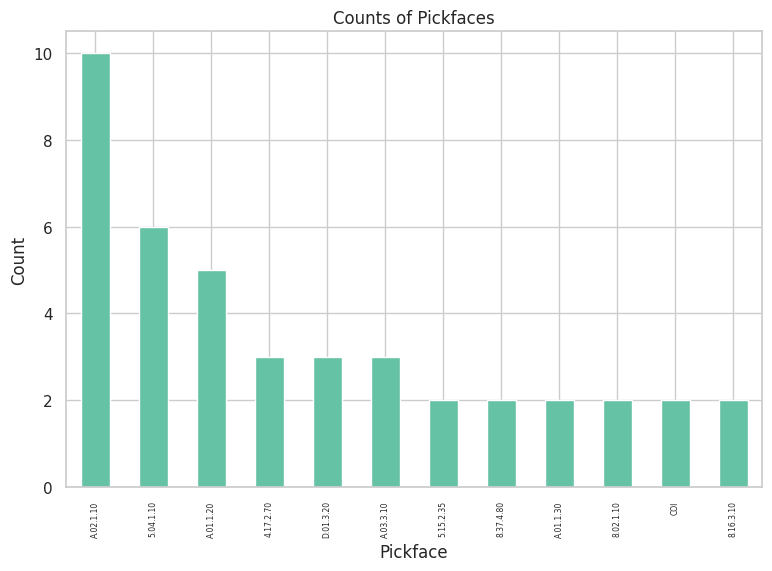

In [69]:
#basic plot for shorted counts of pickfaces 

plt.figure(figsize=(8,6))
pickfaces_2_or_more_shorts.plot(kind='bar')
plt.xlabel('Pickface')
plt.ylabel('Count')
plt.title('Counts of Pickfaces')
plt.xticks(rotation=90, fontsize=5.5)
plt.tight_layout()
plt.show

These are the most shorted pickfaces for Week 2 of December 2023. A.02.1.10 (11440117) and 5.04.1.10 (11440012) were the most shorted. I have only included pickfaces with counts of 2 or more. 

<function matplotlib.pyplot.show(close=None, block=None)>

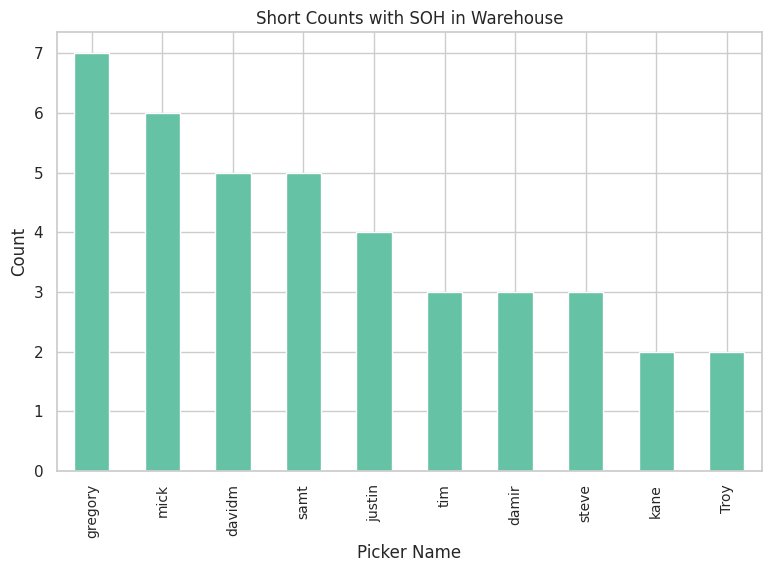

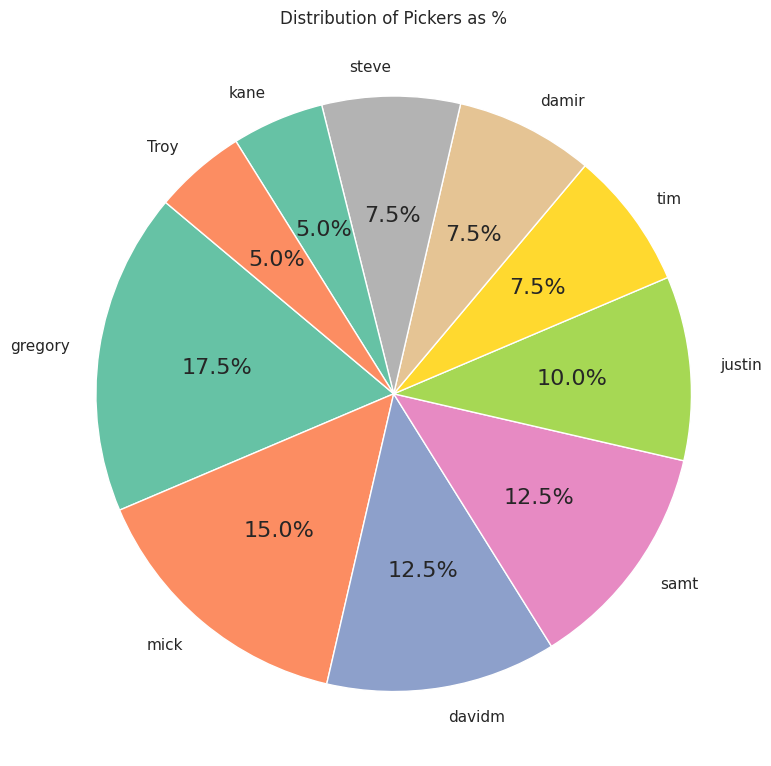

In [70]:
#counts for pickers with shorts on warehouse soh

plt.figure(figsize=(8,6))
Picker_counts_warehouse.plot(kind='bar')
plt.xlabel('Picker Name')
plt.ylabel('Count')
plt.title('Short Counts with SOH in Warehouse')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show

threshold = 5
filtered_counts = Picker_counts_warehouse[Picker_counts_warehouse/Picker_counts_warehouse.sum()* 100 >= threshold]
plt.figure(figsize=(8,8))
plt.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pickers as %')
plt.axis('equal')
plt.tight_layout()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

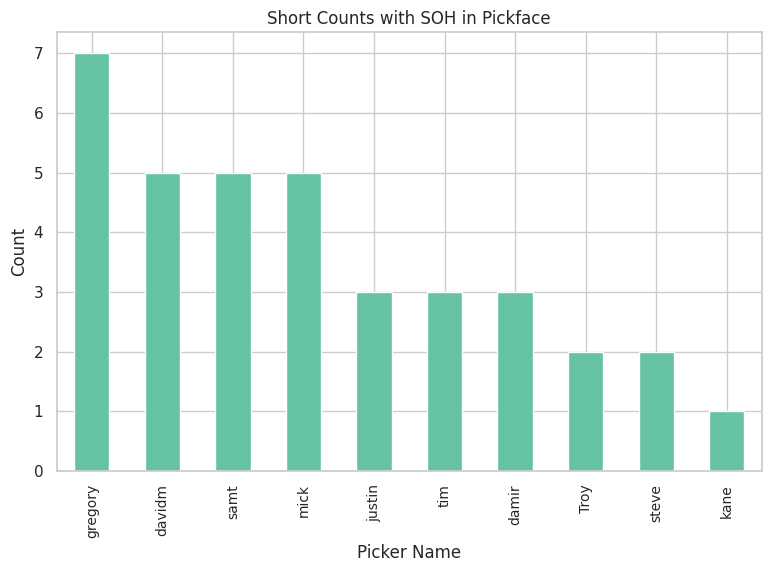

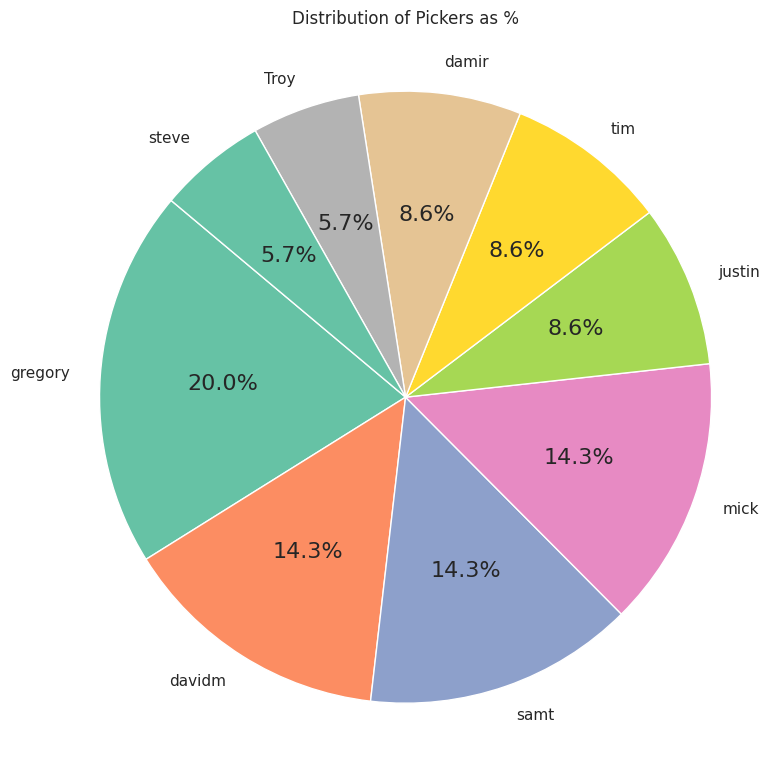

In [81]:
#counts for pickers with shorts with pickface soh

plt.figure(figsize=(8,6))
Picker_counts_pickface.plot(kind='bar')
plt.xlabel('Picker Name')
plt.ylabel('Count')
plt.title('Short Counts with SOH in Pickface')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show

threshold = 5
filtered_counts = Picker_counts_pickface[Picker_counts_pickface/Picker_counts_pickface.sum()* 100 >= threshold]
plt.figure(figsize=(8,8))
plt.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pickers as %')
plt.axis('equal')
plt.tight_layout()

plt.show

### December Week 2 ###

Gregory (17.5%) , Mick (15%), DavidM (12.5%) & SamT (12.5%) were the top 4 people who shorted picks with stock on Hand in the Warehouse. However, when looking at shorts 
for pickface only (soh in pickface) These numbers change slightly. Gregory (20%), DavidM (14.3%), SamT (14.3%), & Mick (14.3%). 

Gregory is shorting the most stock regardless of counts on pickface or warehouse. He shorted 2.5% more stock with SOH in the pickface. SamT is not a picker, suggesting her out of stocking manually
were in fact items with incorrect counts against them. In fact, all of her shorted picks were on the A.02.1.10 pickface, which is the 5L Thickened Cream. 


In [72]:
#Filter for how many items that were picked with a warehouse and pickface qty of 0. 

filtered_items = Short_DecWk2[(Short_DecWk2['Warehouse Qty'] == 0) & (Short_DecWk2['Pickface Qty'] == 0) & (Short_DecWk2['Picked:'] >= 1)]

count_filtered_items = filtered_items.shape[0]

print("Count of items picked with warehouse and pickface quantity of 0:", count_filtered_items)
print("These items are: \n", filtered_items)

Count of items picked with warehouse and pickface quantity of 0: 18
These items are: 
        Pickface  Stock Code   Picker  Warehouse Qty  Pickface Qty  Ordered:  \
4     4.17.1.80    11550016   justin            0.0           0.0       3.0   
5     A.03.3.40    11050213    steve            0.0           0.0      24.0   
24    2.13.3.90    11360009     levi            0.0           0.0       2.0   
59   10.06.2.60    11490394   justin            0.0           0.0       3.0   
67    7.15.2.80    11496128  gregory            0.0           0.0       5.0   
69    2.01.2.80    11100030     levi            0.0           0.0      12.0   
70    9.01.2.50    11490384   justin            0.0           0.0       2.0   
73    4.11.3.30    11160215     levi            0.0           0.0       2.0   
78    8.24.3.10    11610015     levi            0.0           0.0       3.0   
92    4.17.3.20    11010109    damir            0.0           0.0       5.0   
97    8.12.3.75    11650750    damir        

In [73]:
#Export the filtered data out into their own CSVs 
import csv
Picker_counts_warehouse.to_csv('Data/Picker_counts_warehouse_dec2.csv', header=True)
Picker_counts_pickface.to_csv('Data/Picker_counts_pickface_dec2.csv', header = True)
Short_DecWk2.to_csv('Data/Short_Dec2.csv', index=False, header=True)
